In [3]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import transforms
import os
import segmentation_models_pytorch as smp
from architecture import UNet
from PIL import Image


In [7]:
def visualize(model,image_name:str):
    original = Image.open(f'..\\test_image\\{image_name}').convert('RGB')
    original = original.resize((128,128))

    alpha = 0.5
    device = torch.device("cuda:0")
    model.to(device)
    model.eval()
    
    input = (torch.from_numpy(np.array(original)))/255
    input = input.transpose(2,0).transpose(1,2).unsqueeze(0).to(device)
    input = transforms.CenterCrop((128, 128))(input)

    output = model(input)
    output = (output>0.5).float()
    output = output.cpu().detach()

    mask = transforms.ToPILImage()(output.squeeze())
    mask_rgba = mask.copy().convert('RGBA')
    mask_rgba.putalpha(int(255 * alpha)) # Adjust alpha channel of the mask
    original_rgba = original.convert("RGBA") # Create RGBA version of the original image
    overlay = Image.alpha_composite(original_rgba, mask_rgba)# Composite original image and mask with transparency

    fig, axes = plt.subplots(1, 3)

    # Display the images in the subplots
    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(mask)
    axes[1].set_title('Mask predicted')
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title('Original + Mask overlaid')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

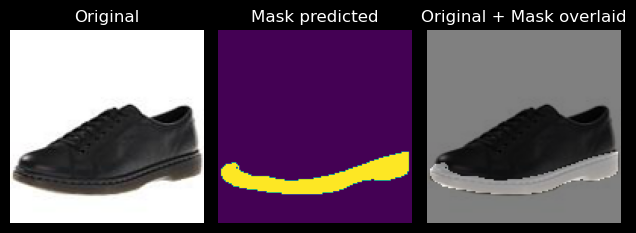

In [12]:
if __name__=='__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = UNet(3,1)
    model.load_state_dict(torch.load('model_weights_v1.pth'))
    visualize(model,image_name='18.jpg')